<a href="https://colab.research.google.com/github/StefaniaMontoyaB/Lenguajes_de_Programacion/blob/main/Examen_Institucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Función para mostrar el menú interactivo con botones
def display_menu():
    clear_output()  # Limpia la pantalla
    print("Selecciona una opción:")

    # Crear botones para cada opción
    button_visualizar = widgets.Button(description="Visualizar Datos")
    button_calcular = widgets.Button(description="Calcular VPN/TIR")
    button_graficar = widgets.Button(description="Graficar Resultados")
    button_salir = widgets.Button(description="Salir")

    # Funciones que se ejecutan cuando se hace clic en cada botón
    def on_button_visualizar_clicked(b):
        print("Visualizar datos de Flujo de Caja.")

    def on_button_calcular_clicked(b):
        print("Calcular VPN/TIR.")

    def on_button_graficar_clicked(b):
        print("Graficar resultados de Flujo de Caja.")

    def on_button_salir_clicked(b):
        clear_output()
        print("Saliendo del programa...")

    # Conectar cada botón con su respectiva función
    button_visualizar.on_click(on_button_visualizar_clicked)
    button_calcular.on_click(on_button_calcular_clicked)
    button_graficar.on_click(on_button_graficar_clicked)
    button_salir.on_click(on_button_salir_clicked)

    # Mostrar los botones
    display(button_visualizar, button_calcular, button_graficar, button_salir)

# Ejecutar el menú
display_menu()

Selecciona una opción:


Button(description='Visualizar Datos', style=ButtonStyle())

Button(description='Calcular VPN/TIR', style=ButtonStyle())

Button(description='Graficar Resultados', style=ButtonStyle())

Button(description='Salir', style=ButtonStyle())

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Flujos_de_caja.csv to Flujos_de_caja (1).csv


In [16]:
# Importamos la librería pandas
import pandas as pd

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv('/content/Flujos_de_caja.csv', encoding='iso-8859-1', sep=';')
# Ver las primeras filas del DataFrame
df.head()

,Proyecto,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [18]:
# Comprobamos si hay valores nulos
df.isnull().sum()


,0
Proyecto,0
Inversion_Inicial,0
Ao_1,0
Ao_2,0
Ao_3,0
Ao_4,0
Ao_5,0
Ao_6,0
Ao_7,0
Ao_8,0


In [23]:
# Exploración de los tipos de datos

# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Proyecto           1000 non-null   object
 1   Inversion_Inicial  1000 non-null   int64 
 2   Ao_1              1000 non-null   int64 
 3   Ao_2              1000 non-null   int64 
 4   Ao_3              1000 non-null   int64 
 5   Ao_4              1000 non-null   int64 
 6   Ao_5              1000 non-null   int64 
 7   Ao_6              1000 non-null   int64 
 8   Ao_7              1000 non-null   int64 
 9   Ao_8              1000 non-null   int64 
 10  Ao_9              1000 non-null   int64 
 11  Ao_10             1000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


In [21]:
# Instalar libreria NumPy Financial
!pip install numpy-financial

In [32]:
# Importación de librerias
import numpy as np
import numpy_financial as npf

In [43]:
# Calculo VPN
df = pd.read_csv('/content/Flujos_de_caja.csv', encoding='iso-8859-1', sep=';')

print("Column names in the DataFrame:")
print(df.columns)

# Establecer 'Proyecto' como índice
df.set_index('Proyecto', inplace=True)

# Definir la tasa de descuento (por ejemplo, 5% o 0.05)
tasa_descuento = 0.05

# Función para calcular el VPN usando numpy_financial.npv
def calcular_vpn(row):
    # Tomar los flujos de caja (sin la columna 'Inversion_Inicial')
    flujos = row.values  # Esto incluye la inversión inicial y los flujos de cada año
    return npf.npv(tasa_descuento, flujos)

# Calcular el VPN para cada proyecto
df['VPN'] = df.apply(calcular_vpn, axis=1)

# Mostrar el resultado
print(df[['VPN']])



Column names in the DataFrame:
Index(['Proyecto', 'Inversion_Inicial', 'Ao_1', 'Ao_2', 'Ao_3', 'Ao_4',
       'Ao_5', 'Ao_6', 'Ao_7', 'Ao_8', 'Ao_9', 'Ao_10'],
      dtype='object')
                                                             VPN
Proyecto                                                        
Winston Smith                                       2.364161e+07
Julia                                               2.750484e+07
O'Brien                                             4.461734e+07
Big Brother                                         7.279434e+07
Don Quijote                                         8.932122e+07
...                                                          ...
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  9.292082e+07
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  5.292792e+07
Odiseo el Sabio el Rojo el Sabio II I               4.636674e+07
Moriarty la Eterna el Rojo II                       2.685384e+07
Amaranta III la Eterna el Ro

In [44]:
# Calculo TIR
# Crear el DataFrame con los datos de los proyectos
df = pd.read_csv('/content/Flujos_de_caja.csv', encoding='iso-8859-1', sep=';')

# Establecer 'Proyecto' como índice
df.set_index('Proyecto', inplace=True)

# Función para calcular la TIR usando numpy_financial.irr
def calcular_tir(row):
    # Tomar los flujos de caja (sin la columna 'Inversion_Inicial')
    flujos = row.values  # Esto incluye la inversión inicial y los flujos de cada año
    return npf.irr(flujos)

# Calcular la TIR para cada proyecto
df['TIR'] = df.apply(calcular_tir, axis=1)

# Mostrar el resultado
print(df[['TIR']])

                                                         TIR
Proyecto                                                    
Winston Smith                                       0.096411
Julia                                               0.109983
O'Brien                                             0.159578
Big Brother                                         0.292613
Don Quijote                                         0.418964
...                                                      ...
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  0.636860
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  0.187365
Odiseo el Sabio el Rojo el Sabio II I               0.209139
Moriarty la Eterna el Rojo II                       0.116199
Amaranta III la Eterna el Rojo de Itaca             0.320014

[1000 rows x 1 columns]


In [45]:
# Estadísticas descriptivas básicas
df.describe(include='all')

,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10,TIR
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-6.011131e+07,1.491443e+07,1.543757e+07,1.494726e+07,1.508328e+07,1.499664e+07,1.452585e+07,1.474249e+07,1.507009e+07,1.500583e+07,1.493154e+07,0.269823
std,2.326539e+07,5.670897e+06,5.730480e+06,5.745627e+06,5.854509e+06,5.835083e+06,5.823820e+06,5.783290e+06,5.863878e+06,5.864704e+06,5.829605e+06,0.182702
min,-9.994527e+07,5.076218e+06,5.019675e+06,5.004138e+06,5.000917e+06,5.006464e+06,5.019156e+06,5.004677e+06,5.000037e+06,5.029882e+06,5.023382e+06,-0.004966
25%,-8.004509e+07,9.802492e+06,1.055513e+07,9.994844e+06,1.012155e+07,9.991937e+06,9.304432e+06,9.662194e+06,9.944576e+06,9.984148e+06,9.759860e+06,0.131283
50%,-5.959744e+07,1.494401e+07,1.557866e+07,1.494062e+07,1.514997e+07,1.502767e+07,1.439013e+07,1.459236e+07,1.518330e+07,1.441793e+07,1.517991e+07,0.216399
75%,-3.956041e+07,1.958610e+07,2.040920e+07,1.997789e+07,2.021412e+07,1.997109e+07,1.938830e+07,1.982090e+07,2.035117e+07,2.020567e+07,1.989067e+07,0.365678
max,-2.006109e+07,2.499750e+07,2.499207e+07,2.497829e+07,2.499835e+07,2.499923e+07,2.497731e+07,2.496854e+07,2.494877e+07,2.499441e+07,2.498939e+07,0.981717


In [56]:
import pandas as pd
import numpy_financial as npf

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/content/Flujos_de_caja.csv', encoding='iso-8859-1', sep=';')

# Mostrar los nombres de las columnas para verificar la estructura
print("Column names in the DataFrame:")
print(df.columns)

# Establecer 'Proyecto' como índice
df.set_index('Proyecto', inplace=True)

# Definir la tasa de descuento (por ejemplo, 5% o 0.05)
tasa_descuento = 0.05

# Función para calcular el VPN usando numpy_financial.npv
def calcular_vpn(row):
    # Tomar los flujos de caja (sin la columna 'Inversion_Inicial')
    flujos = row.values  # Esto incluye la inversión inicial y los flujos de cada año
    return npf.npv(tasa_descuento, flujos)

# Calcular el VPN para cada proyecto
df['VPN'] = df.apply(calcular_vpn, axis=1)

# Ordenar los proyectos por el VPN de mayor a menor
df_ordenado = df.sort_values(by='VPN', ascending=False)

# Seleccionar los 5 proyectos más rentables
top_5_proyectos = df_ordenado.head(5)

# Mostrar los 5 proyectos más rentables
print("\nLos 5 proyectos más rentables:")
print(top_5_proyectos[['VPN']])



Column names in the DataFrame:
Index(['Proyecto', 'Inversion_Inicial', 'Ao_1', 'Ao_2', 'Ao_3', 'Ao_4',
       'Ao_5', 'Ao_6', 'Ao_7', 'Ao_8', 'Ao_9', 'Ao_10'],
      dtype='object')

Los 5 proyectos más rentables:
                                                             VPN
Proyecto                                                        
Starbuck el Justo III de Troya                      1.259476e+08
Julia el Sabio II                                   1.177742e+08
Starbuck de Troya el Rojo III                       1.172666e+08
Robinson Crusoe de Itaca III de Troya el Justo ...  1.170386e+08
O'Brien III el Rojo II                              1.166329e+08


<ipython-input-58-a5185c3b19f7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_proyectos.index, y=top_5_proyectos['VPN'], palette='viridis')


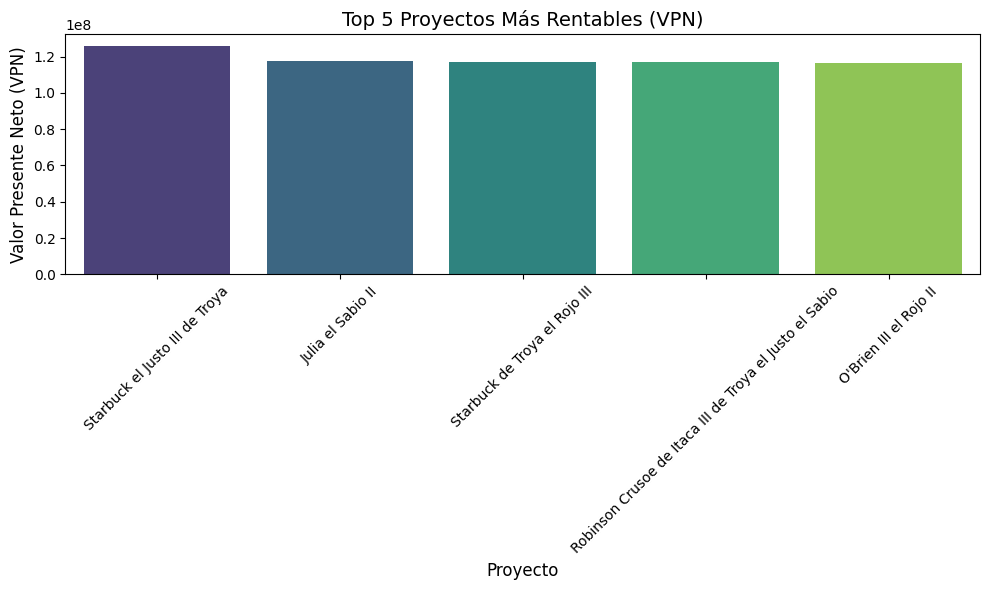

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/content/Flujos_de_caja.csv', encoding='iso-8859-1', sep=';')

# Establecer 'Proyecto' como índice
df.set_index('Proyecto', inplace=True)

# Definir la tasa de descuento (por ejemplo, 5% o 0.05)
tasa_descuento = 0.05

# Función para calcular el VPN usando numpy_financial.npv
def calcular_vpn(row):
    # Tomar los flujos de caja (sin la columna 'Inversion_Inicial')
    flujos = row.values  # Esto incluye la inversión inicial y los flujos de cada año
    return npf.npv(tasa_descuento, flujos)

# Calcular el VPN para cada proyecto
df['VPN'] = df.apply(calcular_vpn, axis=1)

# Ordenar los proyectos por el VPN de mayor a menor
df_ordenado = df.sort_values(by='VPN', ascending=False)

# Seleccionar los 5 proyectos más rentables
top_5_proyectos = df_ordenado.head(5)

# Graficar el VPN de los 5 proyectos más rentables
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_proyectos.index, y=top_5_proyectos['VPN'], palette='viridis')

# Títulos y etiquetas
plt.title('Top 5 Proyectos Más Rentables (VPN)', fontsize=14)
plt.xlabel('Proyecto', fontsize=12)
plt.ylabel('Valor Presente Neto (VPN)', fontsize=12)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [67]:
# Crear el DataFrame con los datos de los proyectos
df = pd.read_csv('/content/Flujos_de_caja.csv', encoding='iso-8859-1', sep=';')

# Establecer 'Proyecto' como índice
df.set_index('Proyecto', inplace=True)

# Función para calcular la TIR usando numpy_financial.irr
def calcular_tir(row):
    # Tomar los flujos de caja (sin la columna 'Inversion_Inicial')
    flujos = row.values  # Esto incluye la inversión inicial y los flujos de cada año
    return npf.irr(flujos)

# Calcular la TIR para cada proyecto
df['TIR'] = df.apply(calcular_tir, axis=1)

# Mostrar el resultado
print(df[['TIR']])

# Tasa de descuento
tasa_descuento = 0.05

# Filtrar proyectos con TIR mayor que la tasa de descuento
proyectos_tir_mayor = df[df['TIR'] > tasa_descuento]

print("Proyectos con una TIR mayor que la tasa de descuento (5%):")
print(proyectos_tir_mayor.reset_index()[['Proyecto', 'TIR']])


                                                         TIR
Proyecto                                                    
Winston Smith                                       0.096411
Julia                                               0.109983
O'Brien                                             0.159578
Big Brother                                         0.292613
Don Quijote                                         0.418964
...                                                      ...
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  0.636860
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  0.187365
Odiseo el Sabio el Rojo el Sabio II I               0.209139
Moriarty la Eterna el Rojo II                       0.116199
Amaranta III la Eterna el Rojo de Itaca             0.320014

[1000 rows x 1 columns]
Proyectos con una TIR mayor que la tasa de descuento (5%):
                                              Proyecto       TIR
0                                        Winston Smith  0.

**En la toma de decisiones:**

Si un proyecto tiene VPN positivo y TIR superior a la tasa de descuento, es una buena inversión, ya que está generando más dinero del que hemos invertido y tiene una rentabilidad atractiva.

Si un proyecto tiene VPN negativo o TIR inferior a la tasa de descuento, no es recomendable invertir en ese proyecto, ya que no está generando suficientes beneficios en relación con el costo del dinero.

